## Начало лабораторной работы

## Цены на автомобили

In [5]:
import pandas as pd
df = pd.read_csv("..//static//csv//car_price_prediction.csv")
print(df.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


Проблемная область: Данные о ценах на автомобили, включая их характеристики

Объект наблюдения: автомобиль

Атрибуты: идентификатор, цена, налог, производитель, модель, год производства, категория, наличие кожаного салона, тип топлива, объем двигателя, пробег автомобиля, количество цилиндров в двигателе, тип коробки передач, тип привода, количество дверей, расположение руля, цвет, количество подушек безопасностей.

Пример бизнес-цели: 
1. Анализ данных: Изучение и очистка данных для выявления закономерностей и корреляций между характеристиками автомобилей и их ценами.
2. Разработка модели: Создание и обучение модели машинного обучения, которая будет прогнозировать цены на автомобили на основе их характеристик.
3. Внедрение: Интеграция модели в систему ценообразования компании для автоматического расчета цен на автомобили.


Актуальность: Данный датасет является актуальным и ценным ресурсом для компаний, занимающихся продажей автомобилей, а также для исследователей и инвесторов, поскольку он предоставляет обширную информацию о ценах и характеристиках автомобилей на вторичном рынке. Эти данные могут быть использованы для разработки моделей прогнозирования цен, анализа рыночных тенденций и принятия обоснованных бизнес-решений.


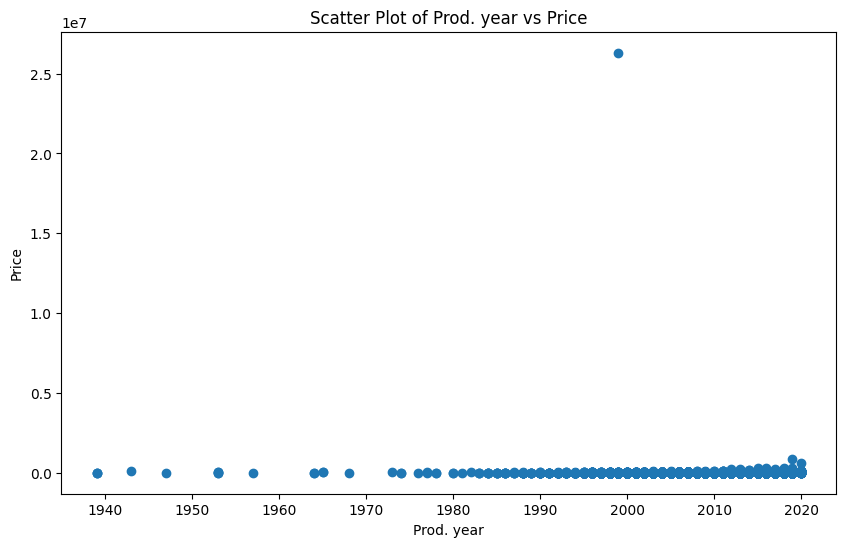

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("..//static//csv//car_price_prediction.csv")

plt.figure(figsize=(10, 6))
plt.scatter(df['Prod. year'], df['Price'])
plt.xlabel('Prod. year')
plt.ylabel('Price')
plt.title('Scatter Plot of Prod. year vs Price')
plt.show()

При проверке на шум можно заметить выброс в 2000 году. Цена там запредельная.

Для удаления выбросов из датасета можно использовать метод межквартильного размаха. Зашумленность не очень высокая. Покрытие данных высокое и подошло бы для поставленной задачи по актуальности.

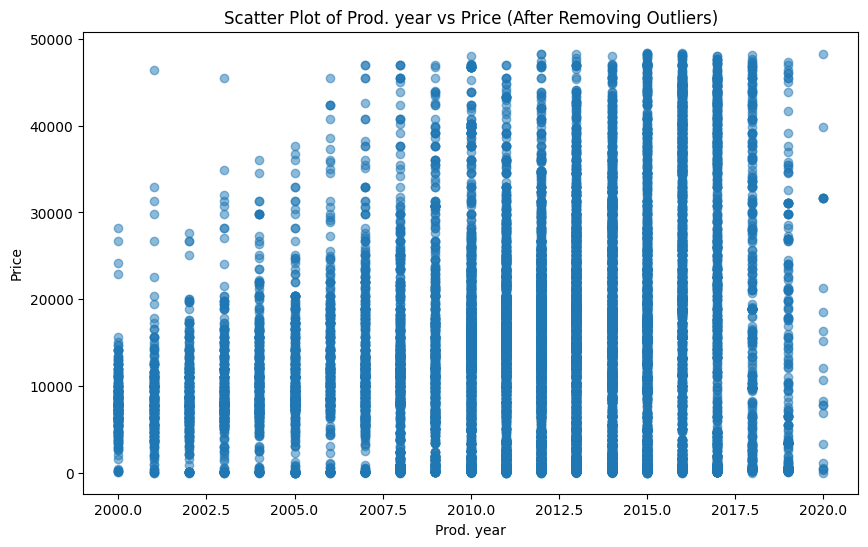

Количество строк до удаления выбросов: 19237
Количество строк после удаления выбросов: 17241


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("..//static//csv//car_price_prediction.csv")

# Выбор столбцов для анализа
column1 = 'Prod. year'
column2 = 'Price'


# Функция для удаления выбросов
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для каждого столбца
df_cleaned = df.copy()
for column in [column1, column2]:
    df_cleaned = remove_outliers(df_cleaned, column)

# Построение точечной диаграммы после удаления выбросов
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned[column1], df_cleaned[column2], alpha=0.5)
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Scatter Plot of {column1} vs {column2} (After Removing Outliers)')
plt.show()

# Вывод количества строк до и после удаления выбросов
print(f"Количество строк до удаления выбросов: {len(df)}")
print(f"Количество строк после удаления выбросов: {len(df_cleaned)}")

Теперь очистим датасет от пустых строк

In [16]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("..//static//csv//car_price_prediction.csv")

# Вывод общей информации о датасете
print("Общая информация о датасете:")
print(df.info())

# Вывод таблицы анализа пропущенных значений
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_values_percentage], axis=1, keys=['Количество пропущенных значений', 'Процент пропущенных значений'])

print("\nТаблица анализа пропущенных значений:")
print(missing_data)

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color      

Пустых строк не было обнаружено.

Теперь создадим выборки.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv("..//static//csv//car_price_prediction.csv")

# Выбор признаков и целевой переменной
X = df.drop('Price', axis=1)  # Признаки (все столбцы, кроме 'Price')
y = df['Price']  # Целевая переменная ('Price')

# Разбиение данных на обучающую и оставшуюся часть (контрольную + тестовую)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Вывод размеров выборок
print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер контрольной выборки: {X_val.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Размер обучающей выборки: 11542
Размер контрольной выборки: 3847
Размер тестовой выборки: 3848


Проанализируем сбалансированность выборок

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv("..//static//csv//car_price_prediction.csv")

# Выбор признаков и целевой переменной
X = df.drop('Price', axis=1)  # Признаки (все столбцы, кроме 'Price')
y = df['Price']  # Целевая переменная ('Price')

# Разбиение данных на обучающую и оставшуюся часть (контрольную + тестовую)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Функция для анализа распределения и вывода результатов
def analyze_distribution(data, title):
    print(f"Распределение Price в {title}:")
    distribution = data.value_counts().sort_index()
    print(distribution)
    total = len(data)
    positive_count = (data > 0).sum()
    negative_count = (data < 0).sum()
    positive_percent = (positive_count / total) * 100
    negative_percent = (negative_count / total) * 100
    print(f"Процент положительных значений: {positive_percent:.2f}%")
    print(f"Процент отрицательных значений: {negative_percent:.2f}%")
    print("\nНеобходима аугментация данных для балансировки классов.\n")

# Анализ распределения для каждой выборки
analyze_distribution(y_train, "обучающей выборке")
analyze_distribution(y_val, "контрольной выборке")
analyze_distribution(y_test, "тестовой выборке")

Распределение Price в обучающей выборке:
Price
1           1
3           8
6           4
19          1
20          4
           ..
260296      1
297930      2
308906      1
872946      1
26307500    1
Name: count, Length: 1764, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%

Необходима аугментация данных для балансировки классов.

Распределение Price в контрольной выборке:
Price
1         1
3         4
6         1
20        1
25        3
         ..
141124    1
144261    1
156805    1
172486    1
627220    1
Name: count, Length: 983, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%

Необходима аугментация данных для балансировки классов.

Распределение Price в тестовой выборке:
Price
3         3
6         1
9         1
20        2
25        7
         ..
153669    1
156805    1
163077    1
216391    1
288521    1
Name: count, Length: 978, dtype: int64
Процент положительных значений: 100.00%
Процент от

Выборки не сбалансированы, и для улучшения качества модели рекомендуется провести аугментацию данных.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Загрузка данных
df = pd.read_csv("..//static//csv//car_price_prediction.csv")

# Выбор признаков и целевой переменной
X = df.drop('Price', axis=1)  # Признаки (все столбцы, кроме 'Price')
y = df['Price']  # Целевая переменная ('Price')

# Разбиение данных на обучающую и оставшуюся часть (контрольную + тестовую)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Применение oversampling к обучающей выборке
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Функция для анализа распределения и вывода результатов
def analyze_distribution(data, title):
    print(f"Распределение Price в {title}:")
    distribution = data.value_counts().sort_index()
    print(distribution)
    total = len(data)
    positive_count = (data > 0).sum()
    negative_count = (data < 0).sum()
    positive_percent = (positive_count / total) * 100
    negative_percent = (negative_count / total) * 100
    print(f"Процент положительных значений: {positive_percent:.2f}%")
    print(f"Процент отрицательных значений: {negative_percent:.2f}%")

# Анализ распределения для каждой выборки
analyze_distribution(y_train_resampled, "обучающей выборке после oversampling")
analyze_distribution(y_val, "контрольной выборке")
analyze_distribution(y_test, "тестовой выборке")

Распределение Price в обучающей выборке после oversampling:
Price
1           169
3           169
6           169
19          169
20          169
           ... 
260296      169
297930      169
308906      169
872946      169
26307500    169
Name: count, Length: 1764, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%
Распределение Price в контрольной выборке:
Price
1         1
3         4
6         1
20        1
25        3
         ..
141124    1
144261    1
156805    1
172486    1
627220    1
Name: count, Length: 983, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%
Распределение Price в тестовой выборке:
Price
3         3
6         1
9         1
20        2
25        7
         ..
153669    1
156805    1
163077    1
216391    1
288521    1
Name: count, Length: 978, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%


## Цены на бриллианты

In [2]:
import pandas as pd
df = pd.read_csv("..//static//csv//Diamonds Prices2022.csv")
print(df.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


Проблемная область: ценообразование бриллиантов

Объект наблюдения: бриллиант

Атрибуты: идентификатор, вес, качество огранки, цвет, чистота, общая глубина, ширина верхней грани, цена, длина, ширина, высота.

Пример бизнес-цели: 
1. Оптимизация ценообразования и повышение эффективности продаж:
Цель: Разработка модели прогнозирования цен на бриллианты, которая позволит компаниям устанавливать конкурентоспособные цены и повысить продажи.

2. Повышение эффективности маркетинговых кампаний:
Цель: Использование данных о бриллиантах для разработки целевых маркетинговых кампаний, направленных на конкретные сегменты рынка.

3. Повышение качества сервиса и удовлетворенности клиентов:
Цель: Использование данных для предоставления клиентам персонализированных рекомендаций и улучшения качества обслуживания.

Актуальность: Данный датасет является актуальным и ценным ресурсом для компаний, работающих на рынке бриллиантов, а также для исследователей и инвесторов, поскольку он предоставляет обширную информацию о ценах и характеристиках бриллиантов. Эти данные могут быть использованы для разработки моделей прогнозирования цен, анализа рыночных тенденций и принятия обоснованных бизнес-решений.

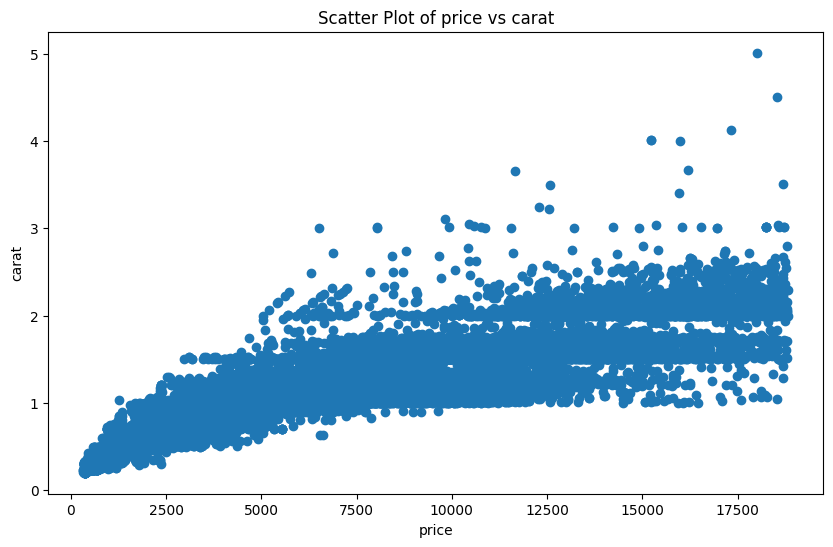

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("..//static//csv//Diamonds Prices2022.csv")

plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['carat'])
plt.xlabel('price')
plt.ylabel('carat')
plt.title('Scatter Plot of price vs carat')
plt.show()

При проверке на шум можно заметить выброс при цене в 17500. Количество карат запредельно.

Для удаления выбросов из датасета можно использовать метод межквартильного размаха. Зашумленность не очень высокая. Покрытие данных высокое и подошло бы для поставленной задачи по актуальности.

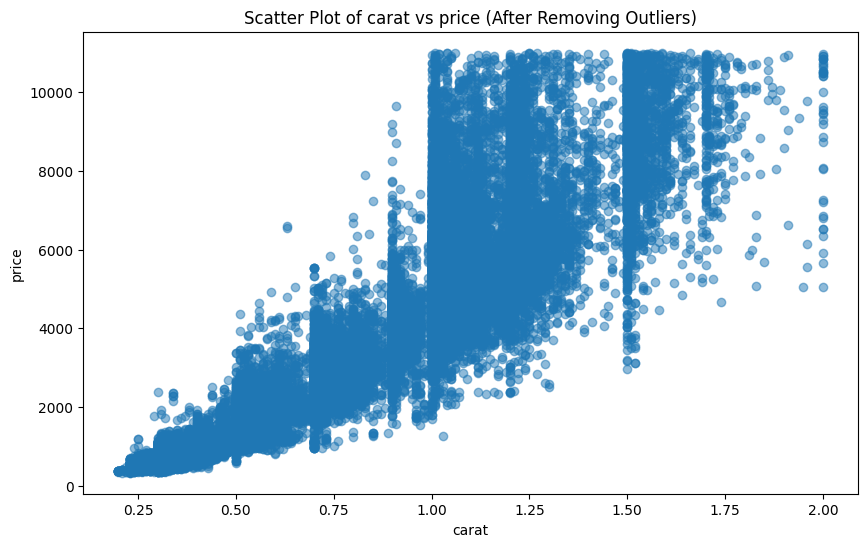

Количество строк до удаления выбросов: 53943
Количество строк после удаления выбросов: 49517


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("..//static//csv//Diamonds Prices2022.csv")

# Выбор столбцов для анализа
column1 = 'carat'
column2 = 'price'


# Функция для удаления выбросов
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для каждого столбца
df_cleaned = df.copy()
for column in [column1, column2]:
    df_cleaned = remove_outliers(df_cleaned, column)

# Построение точечной диаграммы после удаления выбросов
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned[column1], df_cleaned[column2], alpha=0.5)
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Scatter Plot of {column1} vs {column2} (After Removing Outliers)')
plt.show()

# Вывод количества строк до и после удаления выбросов
print(f"Количество строк до удаления выбросов: {len(df)}")
print(f"Количество строк после удаления выбросов: {len(df_cleaned)}")

Теперь очистим датасет от пустых строк

In [31]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("..//static//csv//Diamonds Prices2022.csv")

# Вывод общей информации о датасете
print("Общая информация о датасете:")
print(df.info())

# Вывод таблицы анализа пропущенных значений
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_values_percentage], axis=1, keys=['Количество пропущенных значений', 'Процент пропущенных значений'])

print("\nТаблица анализа пропущенных значений:")
print(missing_data)

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None

Таблица анализа пропущенных значений:
            Количество пропущенных значений  Процент пропущенных значений
Unnamed: 0                                0                           0.0
carat                                     0                           0.0
c

Пустых строк не было обнаружено.

Теперь создадим выборки.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv("..//static//csv//Diamonds Prices2022.csv")

# Выбор признаков и целевой переменной
X = df.drop('carat', axis=1)  # Признаки (все столбцы, кроме 'carat')
y = df['carat']  # Целевая переменная ('carat')

# Разбиение данных на обучающую и оставшуюся часть (контрольную + тестовую)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Вывод размеров выборок
print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер контрольной выборки: {X_val.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Размер обучающей выборки: 32365
Размер контрольной выборки: 10789
Размер тестовой выборки: 10789


Проанализируем сбалансированность выборок

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv("..//static//csv//Diamonds Prices2022.csv")

# Выбор признаков и целевой переменной
X = df.drop('carat', axis=1)  # Признаки (все столбцы, кроме 'carat')
y = df['carat']  # Целевая переменная ('carat')

# Разбиение данных на обучающую и оставшуюся часть (контрольную + тестовую)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Функция для анализа распределения и вывода результатов
def analyze_distribution(data, title):
    print(f"Распределение carat в {title}:")
    distribution = data.value_counts().sort_index()
    print(distribution)
    total = len(data)
    positive_count = (data > 0).sum()
    negative_count = (data < 0).sum()
    positive_percent = (positive_count / total) * 100
    negative_percent = (negative_count / total) * 100
    print(f"Процент положительных значений: {positive_percent:.2f}%")
    print(f"Процент отрицательных значений: {negative_percent:.2f}%")

# Анализ распределения для каждой выборки
analyze_distribution(y_train, "обучающей выборке")
analyze_distribution(y_val, "контрольной выборке")
analyze_distribution(y_test, "тестовой выборке")

Распределение carat в обучающей выборке:
carat
0.20      7
0.21      5
0.22      4
0.23    178
0.24    139
       ... 
3.40      1
3.65      1
3.67      1
4.13      1
4.50      1
Name: count, Length: 263, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%
Распределение carat в контрольной выборке:
carat
0.20     2
0.21     2
0.23    62
0.24    58
0.25    51
        ..
3.11     1
3.51     1
4.00     1
4.01     1
5.01     1
Name: count, Length: 232, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%
Распределение carat в тестовой выборке:
carat
0.20     3
0.21     2
0.22     1
0.23    53
0.24    57
        ..
3.00     1
3.01     1
3.04     1
3.50     1
4.01     1
Name: count, Length: 241, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%


## Цены на кофе

In [3]:
import pandas as pd
df = pd.read_csv("..//static//csv//Starbucks Dataset.csv")
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Проблемная область: ценообразование кофе

Объект наблюдения: кофе

Атрибуты: дата, цена на момент открытия, максимальная цена, минимальная цена, цена на момент закрытия, скорректированная цена закрытия, объем

Пример бизнес-цели: 
1. Анализ рыночных тенденций:
Цель: Определить долгосрочные тенденции в ценах на кофе.

2. Прогнозирование цен:
Цель: Разработать модель прогнозирования будущих цен на кофе.

3. Оценка рисков:
Цель: Оценить риски, связанные с колебаниями цен на кофе.


Актуальность: Данные о ценах на кофе являются крайне актуальными для компаний, работающих в сфере кофейной индустрии, а также для инвесторов и трейдеров, заинтересованных в сырьевом рынке. Понимание динамики цен на кофе позволяет оптимизировать стратегии закупок, управления запасами и ценообразования, что в конечном итоге влияет на прибыльность бизнеса и эффективность инвестиций.

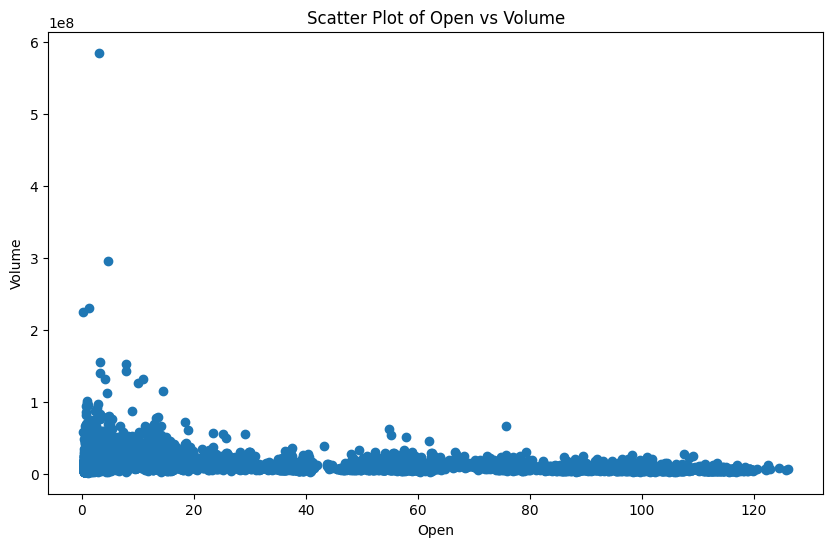

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("..//static//csv//Starbucks Dataset.csv")

plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Volume'])
plt.xlabel('Open')
plt.ylabel('Volume')
plt.title('Scatter Plot of Open vs Volume')
plt.show()

Выброс присутствует. Сделаем очистку данных.

Для удаления выбросов из датасета можно использовать метод межквартильного размаха. Зашумленность не очень высокая. Покрытие данных высокое и подошло бы для поставленной задачи по актуальности.

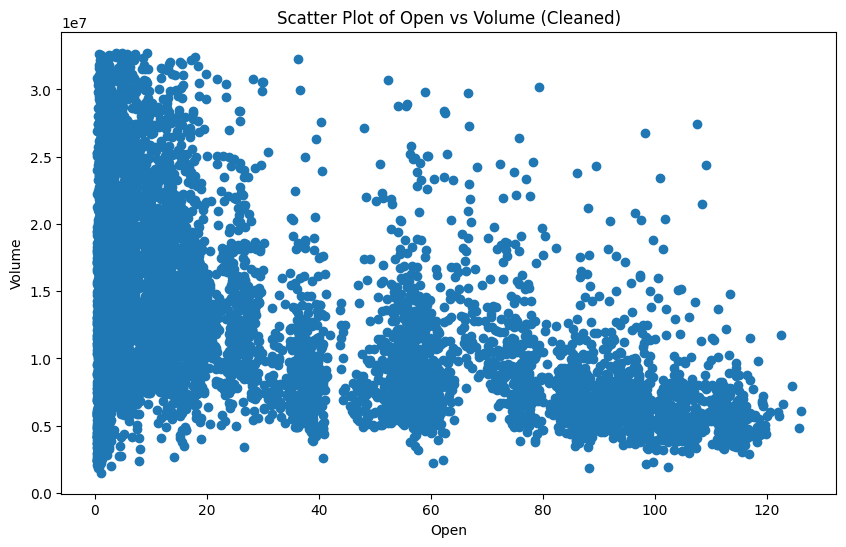

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("..//static//csv//Starbucks Dataset.csv")

# Функция для удаления выбросов с использованием IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для столбцов 'Open' и 'Volume'
df_cleaned = remove_outliers_iqr(df, 'Open')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Volume')

# Построение графика для очищенных данных
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Open'], df_cleaned['Volume'])
plt.xlabel('Open')
plt.ylabel('Volume')
plt.title('Scatter Plot of Open vs Volume (Cleaned)')
plt.show()

Теперь очистим датасет от пустых строк

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("..//static//csv//Starbucks Dataset.csv")

# Вывод количества строк до очистки
print(f"Количество строк до очистки: {len(df)}")

# Удаление пустых строк
df_cleaned = df.dropna()


# Функция для удаления выбросов с использованием IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для столбцов 'Open' и 'Volume'
df_cleaned = remove_outliers_iqr(df_cleaned, 'Open')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Volume')

# Вывод количества строк после удаления выбросов
print(f"Количество строк после удаления выбросов: {len(df_cleaned)}")


Количество строк до очистки: 8036
Количество строк после удаления выбросов: 7585


Теперь создадим выборки

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv("..//static//csv//Diamonds Prices2022.csv")

# Выбор столбцов для анализа
column1 = 'carat'
column2 = 'price'

# Функция для удаления выбросов
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для каждого столбца
df_cleaned = df.copy()
for column in [column1, column2]:
    df_cleaned = remove_outliers(df_cleaned, column)

# Разделение данных на обучающую и тестовую выборки
X = df_cleaned[[column1]]
y = df_cleaned[column2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную выборки
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Вывод размеров выборок
print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер контрольной выборки: {len(X_val)}")
print(f"Размер тестовой выборки: {len(X_test)}")


Размер обучающей выборки: 29709
Размер контрольной выборки: 9904
Размер тестовой выборки: 9904


Проанализируем сбалансированность выборок

Размер обучающей выборки: 29709
Размер контрольной выборки: 9904
Размер тестовой выборки: 9904


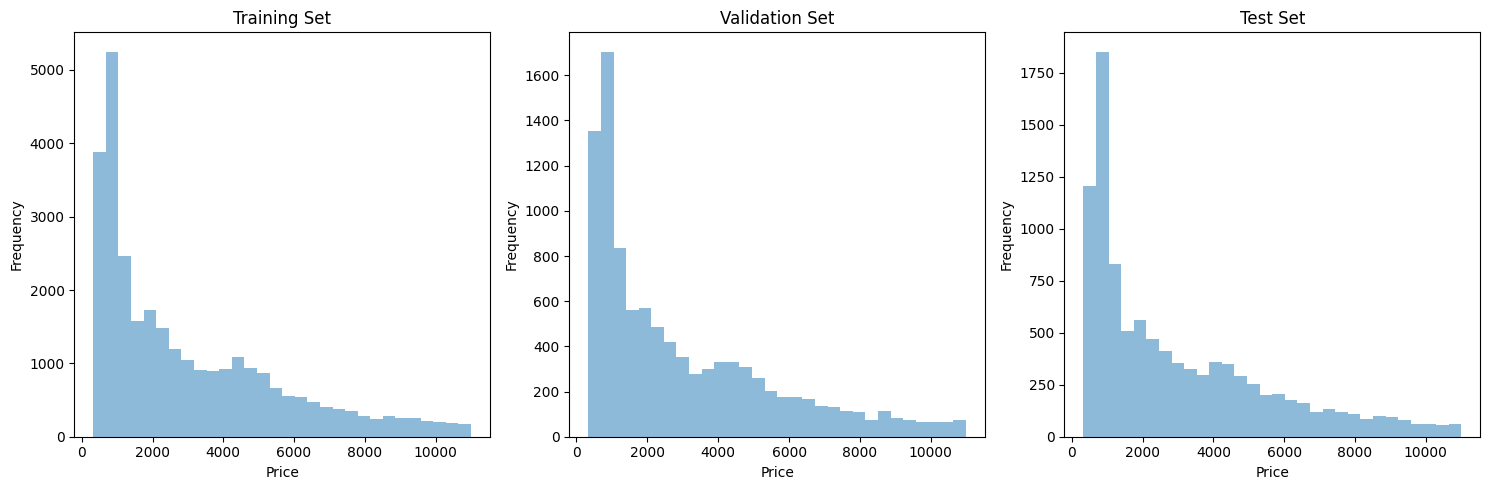


Статистика для Training Set:
Среднее: 3021.2620418055135
Медиана: 2090.0
Стандартное отклонение: 2574.5120319534017

Статистика для Validation Set:
Среднее: 3012.331684168013
Медиана: 2059.5
Стандартное отклонение: 2587.9320915537055

Статистика для Test Set:
Среднее: 3020.2212237479807
Медиана: 2097.5
Стандартное отклонение: 2568.915633156046


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv("..//static//csv//Diamonds Prices2022.csv")

# Выбор столбцов для анализа
column1 = 'carat'
column2 = 'price'

# Функция для удаления выбросов
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для каждого столбца
df_cleaned = df.copy()
for column in [column1, column2]:
    df_cleaned = remove_outliers(df_cleaned, column)

# Разделение данных на обучающую и тестовую выборки
X = df_cleaned[[column1]]
y = df_cleaned[column2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную выборки
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Вывод размеров выборок
print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер контрольной выборки: {len(X_val)}")
print(f"Размер тестовой выборки: {len(X_test)}")

# Построение гистограмм для каждой выборки
plt.figure(figsize=(15, 5))

# Гистограмма для обучающей выборки
plt.subplot(1, 3, 1)
plt.hist(y_train, bins=30, alpha=0.5, label='Train')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Training Set')

# Гистограмма для контрольной выборки
plt.subplot(1, 3, 2)
plt.hist(y_val, bins=30, alpha=0.5, label='Validation')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Validation Set')

# Гистограмма для тестовой выборки
plt.subplot(1, 3, 3)
plt.hist(y_test, bins=30, alpha=0.5, label='Test')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Test Set')

plt.tight_layout()
plt.show()

# Вычисление статистических показателей
def print_stats(data, name):
    print(f"\nСтатистика для {name}:")
    print(f"Среднее: {data.mean()}")
    print(f"Медиана: {data.median()}")
    print(f"Стандартное отклонение: {data.std()}")

print_stats(y_train, 'Training Set')
print_stats(y_val, 'Validation Set')
print_stats(y_test, 'Test Set')

Мы вычислили среднее, медиану и стандартное отклонение для каждой выборки. Если эти показатели для всех выборок близки, это также указывает на сбалансированность выборок.